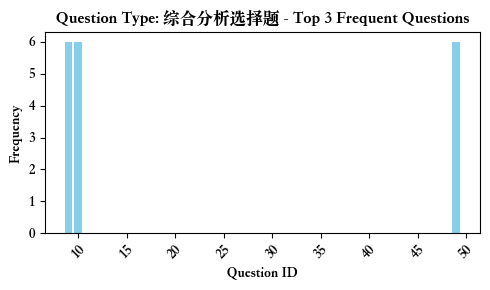

Top three frequent questions per question type have been saved to fewshot_top_questions.json, and the bar charts have been plotted.


In [4]:
import json
import glob
import os
from collections import defaultdict, Counter
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = ['Songti SC'] 
# 获取当前脚本的工作目录
current_working_directory = os.getcwd()

# 指定搜索的文件模式，比如所有以'wrong_ans'开头的.json文件
# 这里假设这些文件位于当前工作目录或其子目录中
search_pattern = os.path.join(current_working_directory, '**', '4.wrong_ans*.json')

# 使用glob.glob方法搜索文件，参数recursive=True允许在所有子目录中搜索
files = glob.glob(search_pattern, recursive=True)

# 接下来的步骤与之前相同，处理找到的文件...
all_questions = []

for file in files:
    with open(file, 'r', encoding='utf-8') as f:
        questions = json.load(f)
        all_questions.extend(questions)

question_freq_by_type = defaultdict(Counter)

for question in all_questions:
    question_type = question['question_type']
    question_id = question['id']
    question_freq_by_type[question_type][question_id] += 1

top_questions_by_type = {}

for question_type, counter in question_freq_by_type.items():
    top_items = counter.most_common(3)
    top_ids = [qid for qid, _ in top_items]
    top_frequencies = [freq for _, freq in top_items]
    
    plt.figure(figsize=(5, 3))
    plt.bar(top_ids, top_frequencies, color='skyblue')
    plt.xlabel('Question ID')
    plt.ylabel('Frequency')
    plt.title(f'Question Type: {question_type} - Top 3 Frequent Questions')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    top_questions = [q for q in all_questions if q['id'] in top_ids]
    top_questions_by_type[question_type] = top_questions

with open('fewshot_top_questions.json', 'w', encoding='utf-8') as f:
    json.dump(top_questions_by_type, f, ensure_ascii=False, indent=4)

print("Top three frequent questions per question type have been saved to fewshot_top_questions.json, and the bar charts have been plotted.")
